In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
np.random.seed(42)
count_points =4 

In [31]:

range_x = [-16, 16]
data_x = np.sort(np.random.uniform(*range_x, count_points))
data_x

array([-4.0147162 ,  3.15707149,  7.42380614, 14.42285781])

In [32]:
range_y = [-128, 128]
data_y = np.random.uniform(*range_y, count_points)
data_y

array([ -88.05922805,  -88.06540279, -113.13059528,   93.74109332])

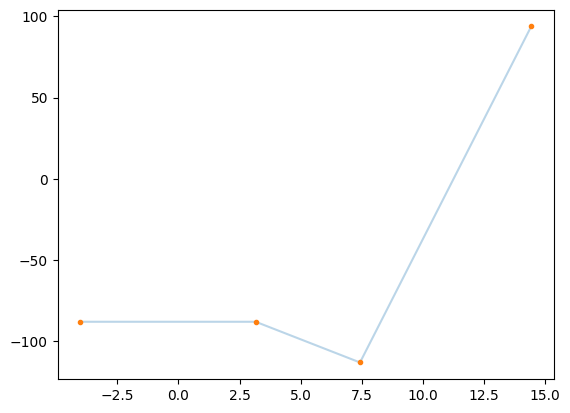

In [33]:
plt.plot(data_x, data_y,  alpha=0.3)
plt.plot(data_x, data_y, '.', )

In [37]:
from sklearn.base import BaseEstimator, RegressorMixin
class LagrangeInerpolator(BaseEstimator, RegressorMixin):
    def __init__(self):
        self._X = None
        self._Y = None
        self.l_i = None
        self._point_count = 0
    def fit(self, x, y):
        x = np.asarray(x).flatten()
        y = np.asarray(y).flatten()
        if x.shape[0] != y.shape[0]:
            raise ValueError("X and y must have the same length.")
        self._X = x
        self._Y = y
        self._point_count = x.shape[0]
        self._L = np.ones((self._point_count, self._X.shape[0]))

        return self
    
    def predict(self, x):
        if self._X is None:
            raise ValueError("Model not fitted. Call `fit()` first.")
        X = np.asarray(x).flatten()
        y_pred = np.zeros_like(X, dtype=float)
        for i in range(self._point_count):
            l_i = np.ones_like(X, dtype=float)
            for j in range(self._point_count):
                if i != j:
                    l_i *= (X - self._X[j]) / (self._X[i] - self._X[j])
            # Sum y_i * l_i(x)
            y_pred += self._Y[i] * l_i

        return y_pred
    def __call__(self, x):
        return self.predict(np.array([x]))[0]
                
        
        
        

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


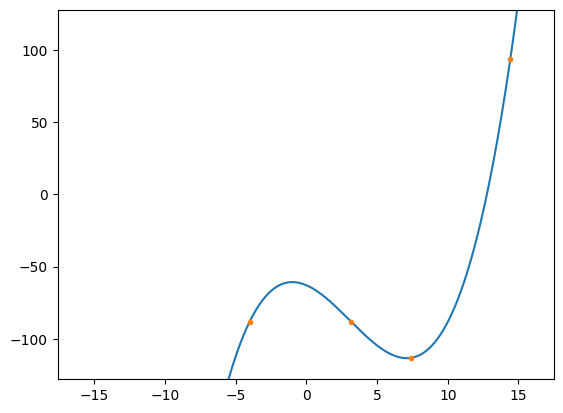

In [36]:
li = LagrangeInerpolator()
li.fit(data_x, data_y)
full_x = np.arange(*range_x, 0.1)
pr=li.predict(full_x)
plt.ylim(*(np.array(range_y)*1))
plt.plot(full_x, pr)
plt.plot(data_x, data_y, '.')